# Exploratory Data Analisys with Pandas

The purpose of the following notebook is to do a basic EDA Police Stops dataset from Stanford Open Policing Project
wich can be found here: https://openpolicing.stanford.edu/data/

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/ca_san_diego_2020_04_01.csv')

In [53]:
# Display first 5 rows
df.dropna().head(5)

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
80,82,2014-01-02,13:30:00,Unknown,25.0,hispanic,male,vehicular,False,False,...,warning,True,True,False,True,probable cause,Odor of Contraband,Moving Violation,Verbal Warning|FI,HISPANIC
127,131,2014-01-03,06:50:00,310,28.0,hispanic,male,vehicular,False,True,...,citation,False,True,False,True,other,Inventory Search,Moving Violation,Citation,HISPANIC
171,177,2014-01-03,18:50:00,810,27.0,hispanic,female,vehicular,False,True,...,citation,False,True,True,False,other,Inventory Search [Prior to Impound],Equipment Violation,Citation,HISPANIC
221,227,2014-01-04,07:35:00,310,36.0,white,male,vehicular,False,True,...,citation,True,True,False,True,consent,Consent Search,Equipment Violation,Citation,WHITE
295,302,2014-01-05,02:30:00,240,23.0,asian/pacific islander,male,vehicular,False,False,...,warning,False,True,True,False,consent,Consent Search,Equipment Violation,Verbal Warning|FI,OTHER ASIAN


In [3]:
# Display last 5 rows
df.tail(5)

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
383022,22328|23428|25249|37956|58992|60924|62384|1134...,NaN,NaN,620,NaN,NaN,NaN,vehicular,NaN,True,...,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,88615|178144,NaN,NaN,710,NaN,NaN,NaN,vehicular,NaN,True,...,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,141559,2014-12-22,NaN,720,NaN,NaN,NaN,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,72218|164647,NaN,NaN,810,NaN,NaN,NaN,vehicular,NaN,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN
383026,35299|35770|37955|51788|68873|131546|150205|16...,NaN,NaN,Unknown,NaN,NaN,NaN,vehicular,NaN,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation|Moving Violation|Moving Viola...,NA|NA|NA|NA|Citation|Citation|NA|Citation|NA|NA,NaN


In [4]:
# How many rows and columns
df.shape

(383027, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383027 entries, 0 to 383026
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   raw_row_number                383027 non-null  object 
 1   date                          382844 non-null  object 
 2   time                          382292 non-null  object 
 3   service_area                  383027 non-null  object 
 4   subject_age                   371064 non-null  float64
 5   subject_race                  381793 non-null  object 
 6   subject_sex                   382366 non-null  object 
 7   type                          383027 non-null  object 
 8   arrest_made                   348284 non-null  object 
 9   citation_issued               351056 non-null  object 
 10  warning_issued                351056 non-null  object 
 11  outcome                       343855 non-null  object 
 12  contraband_found              16288 non-null

In [6]:
# Gives a Descrptive Statistics summary
df.describe(include="all")

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
count,383027,382844,382292,383027,371064.000000,381793,382366,383027,348284,351056,...,343855,16288,383027,380837,380837,16288,14278,382808,351056,381793
unique,383027,1186,1440,25,NaN,5,2,1,2,2,...,3,2,2,2,2,5,632,97,166,18
top,1,2014-02-05,22:00:00,310,NaN,white,male,vehicular,False,True,...,citation,False,False,False,False,other,Inventory Search [Prior to Impound],Moving Violation,Citation,WHITE
freq,1,853,2737,31511,NaN,162226,248398,383027,343469,221137,...,219712,14735,366739,373413,370738,10855,4024,279839,216258,162226
mean,NaN,NaN,NaN,NaN,37.095956,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.183295,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,47.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Simple way to get columns to perform different analisys and stuff
df.columns

Index(['raw_row_number', 'date', 'time', 'service_area', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis', 'reason_for_search',
       'reason_for_stop', 'raw_action_taken', 'raw_subject_race_description'],
      dtype='object')

In [58]:
print("Quantity of null/nan values: ", df.isnull().sum().sum())

Quantity of null/nan values:  1292664


In [8]:
df["contraband_found"].value_counts()

contraband_found
False    14735
True      1553
Name: count, dtype: int64

In [9]:
df["raw_subject_race_description"].value_counts()

raw_subject_race_description
WHITE               162226
HISPANIC            117083
BLACK                42705
OTHER                27238
OTHER ASIAN          17811
FILIPINO              5162
VIETNAMESE            2862
CHINESE               2090
INDIAN                1976
KOREAN                 563
JAPANESE               477
PACIFIC ISLANDER       425
ASIAN INDIAN           310
LAOTIAN                284
SAMOAN                 218
CAMBODIAN              200
GUAMANIAN              107
HAWAIIAN                56
Name: count, dtype: int64

<Axes: xlabel='Quantity of stops of the first 5', ylabel='Driver Age'>

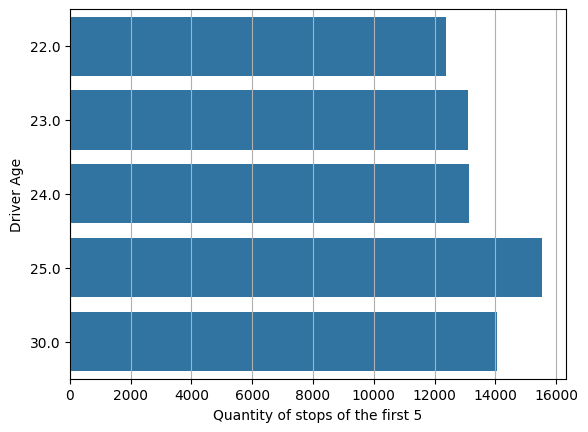

In [45]:
plt.ylabel("Driver Age")
plt.xlabel("Quantity of stops of the first 5")
plt.grid()
sns.barplot(df["subject_age"].dropna().value_counts().head(5), orient="h")